In [31]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

First 5 rows of the dataset:


,X1,X2,X3,X4,X5
0,4.370861,11.752534,-7.03,6.170258,4.826922
1,9.556429,29.133794,-19.43,8.576459,1.202224
2,7.587945,23.349981,-15.21,2.257951,3.418096
3,6.387926,17.735076,-14.78,8.160000,5.874708
4,2.404168,10.944052,-4.85,2.814646,6.701304



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   X4      200 non-null    float64
 4   X5      200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB

Missing Values:
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

Statistical Summary:


,X1,X2,X3,X4,X5
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.355966,16.202983,-10.824952,5.413830,5.595808
std,2.653900,8.149839,5.585977,2.554701,2.724868
min,1.049699,1.164549,-23.150000,1.041688,1.098962
25%,3.057242,9.024686,-15.302500,3.075571,3.101011
50%,5.450376,15.658538,-10.685000,5.317742,5.745823
75%,7.811737,23.354167,-6.107500,7.652013,8.089127
max,9.881982,32.167892,0.779584,9.971868,9.981407



Pairwise Relationships:


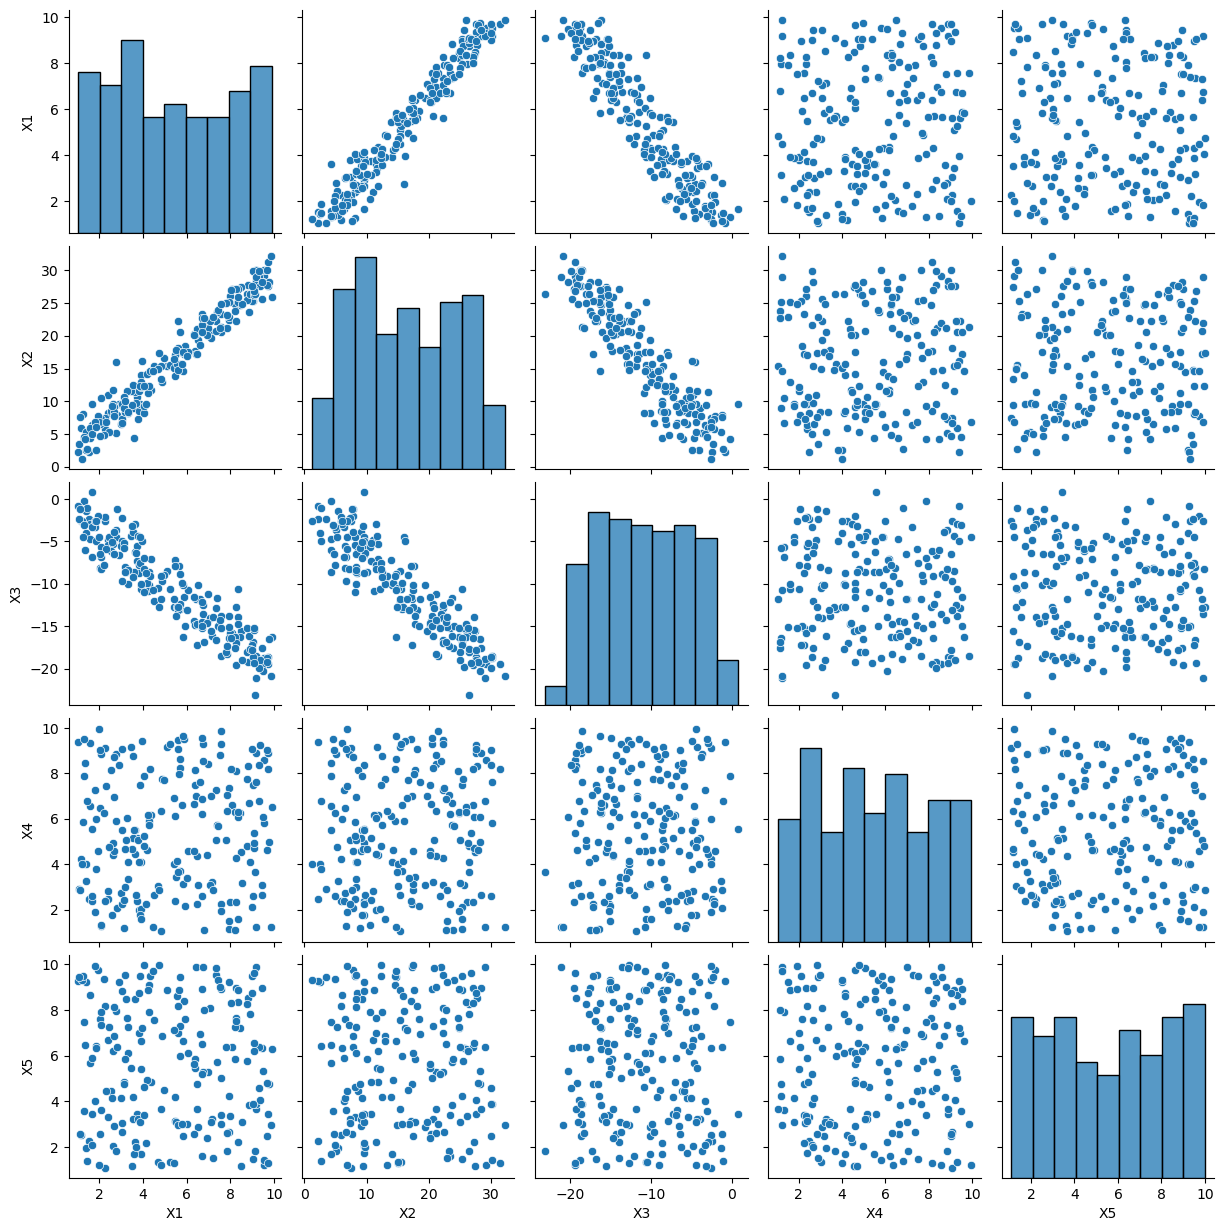


Correlation Matrix:


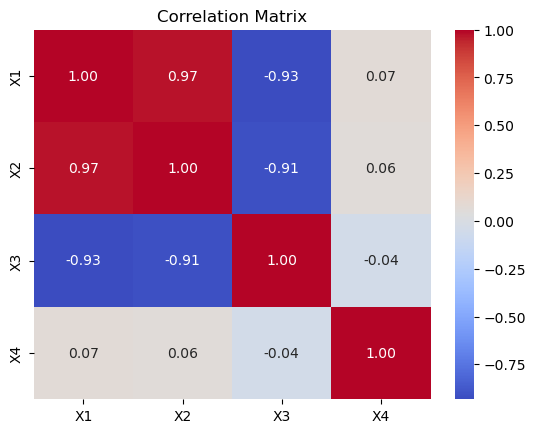

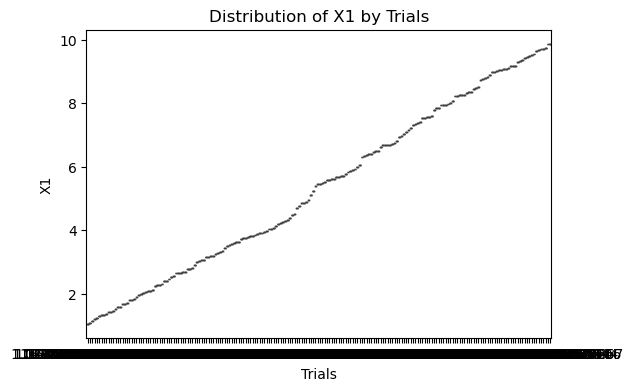

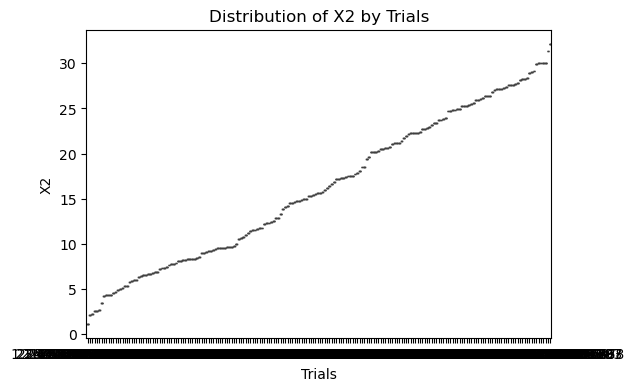

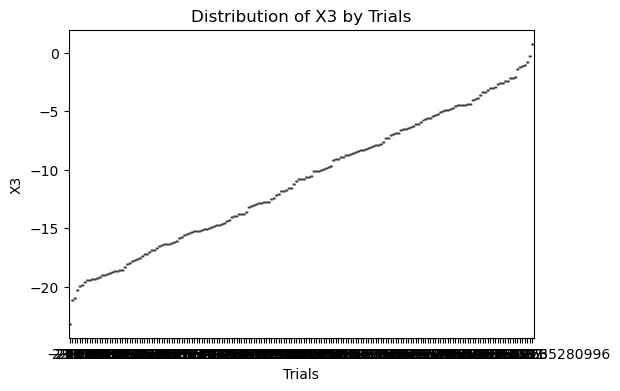

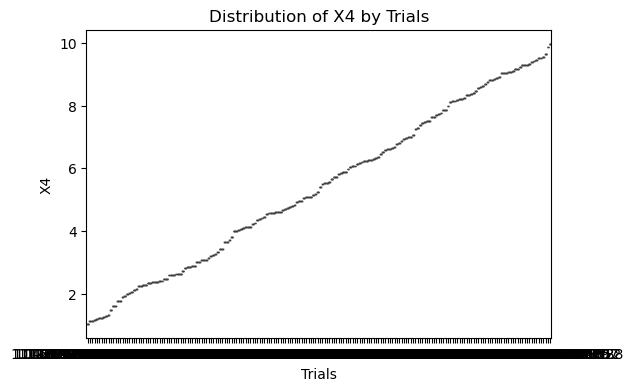

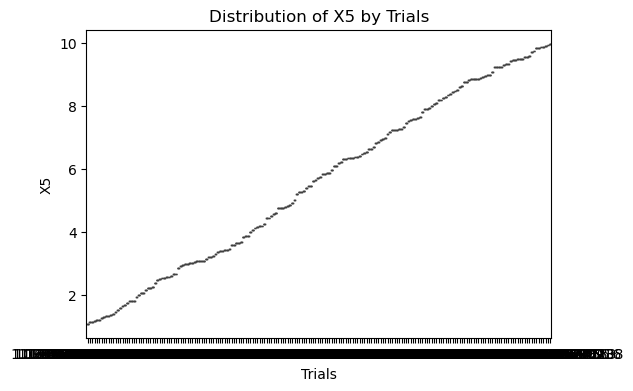

In [37]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dt = pd.read_csv('pca_dataset.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(dt.head())

# Basic information about the dataset
print("\nDataset Info:")
dt.info()

# Check for missing values
print("\nMissing Values:")
print(dt.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary:")
display(dt.describe())

# Count the number of samples for each species
#print("\nSpecies Count:")
#print(pca['species'].value_counts())

# Pairplot to visualize pairwise relationships between features
print("\nPairwise Relationships:")
sns.pairplot(dt)#, hue='species', diag_kind='kde')
plt.show()

# Correlation matrix and heatmap
print("\nCorrelation Matrix:")
correlation_matrix = dt.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for feature distribution by species
features = dt#.columns[:-1]  # Exclude the species column
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y=feature, data=dt)
    plt.title(f'Distribution of {feature} by Trials')
    plt.xlabel('Trials')
    plt.ylabel(feature)
    plt.show()

Original Data:
           X1         X2     X3        X4        X5
0    4.370861  11.752534  -7.03  6.170258  4.826922
1    9.556429  29.133794 -19.43  8.576459  1.202224
2    7.587945  23.349981 -15.21  2.257951  3.418096
3    6.387926  17.735076 -14.78  8.160000  5.874708
4    2.404168  10.944052  -4.85  2.814646  6.701304
..        ...        ...    ...       ...       ...
195  4.142886   9.613731  -8.69  2.261019  2.165634
196  7.533601  21.163915 -14.32  8.816212  8.998733
197  9.073992  26.795083 -19.36  5.386881  9.600000
198  8.983778  27.573149 -17.79  9.050970  8.759149
199  8.018880  27.007352 -16.35  8.198697  8.285645

[200 rows x 5 columns]

Standardized Data:
           X1        X2        X3        X4        X5
0   -0.372123 -0.547449  0.681076  0.296835 -0.282882
1    1.586723  1.590615 -1.544339  1.241071 -1.616449
2    0.843129  0.879150 -0.786980 -1.238422 -0.801205
3    0.389823  0.188462 -0.709808  1.077645  0.102610
4   -1.115041 -0.646900  1.072318 -1.019965  0.

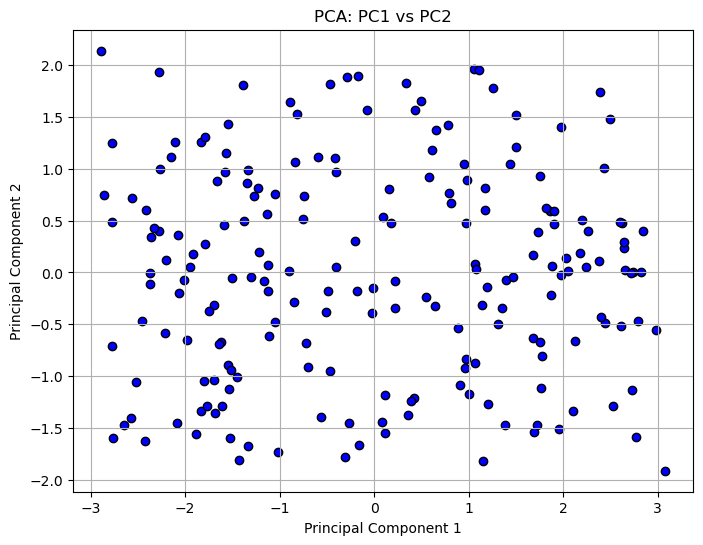

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample data
pca = pd.read_csv('pca_dataset.csv')

df = pd.DataFrame(pca)
print("Original Data:")
print(df)

# Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
print("\nStandardized Data:")
print(standardized_df)

# Applying PCA to reduce to two principal components
pca = PCA(n_components=5)
pca_data = pca.fit_transform(standardized_data)

# Convert back to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3','PC4','PC5'])
print("\nPCA Reduced Data:")
print(pca_df)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance)

# Visualize scikit-learn results
# Plot PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='b', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid()
plt.show()

In [ ]:
#There is no relationship between the principal component 1 and 2. Even though they atribute to 77% of the explained variance.